In [1]:
sc

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
7,application_1589660637587_0008,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-7>

In [2]:
%%configure -f
{ "conf":{
"spark.pyspark.python": "python3",
"spark.pyspark.virtualenv.enabled": "true",
"spark.pyspark.virtualenv.type":"native",
"spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
}}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
8,application_1589660637587_0009,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
6,application_1589660637587_0007,pyspark,idle,Link,Link,
8,application_1589660637587_0009,pyspark,idle,Link,Link,✔


In [3]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("matplotlib")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

In [4]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('data_processing').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
#importamos todos los datasets
col=spark.read.csv('s3://covid19proyecto3/datasets/colombia/Casos_positivos_de_COVID-19_en_Colombia.csv',inferSchema=True,header=True)
global_cases=spark.read.csv('s3://covid19proyecto3/datasets/mundial/time_series_covid19_confirmed_global_narrow.csv',inferSchema=True,header=True)
global_recovered= spark.read.csv('s3://covid19proyecto3/datasets/mundial/time_series_covid19_recovered_global_narrow.csv',inferSchema=True,header=True)
global_deaths= spark.read.csv('s3://covid19proyecto3/datasets/mundial/time_series_covid19_deaths_global_narrow.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

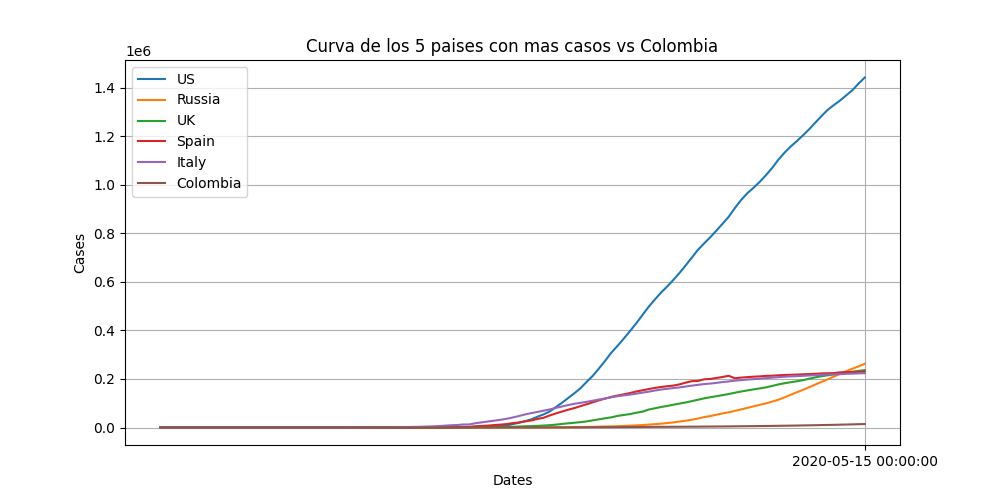

In [8]:
#Libreria matplot y pandas
import matplotlib.pyplot as plt
import pandas as pd

#Historico de los 5 paises mas infectados vs Colombia
#US
global_cases=global_cases.withColumn("Dates",global_cases['Date'].astype('String'))
datessu=  global_cases.filter(global_cases['Country/Region']=='US').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadu= global_cases.filter(global_cases['Country/Region']=='US').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Russia
datessr=  global_cases.filter(global_cases['Country/Region']=='Russia').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadr= global_cases.filter(global_cases['Country/Region']=='Russia').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#United Kingdom
datessuk=  global_cases.filter(global_cases['Country/Region']=='United Kingdom').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidaduk= global_cases.filter(global_cases['Country/Region']=='United Kingdom').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Spain
datessus=  global_cases.filter(global_cases['Country/Region']=='Spain').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadus= global_cases.filter(global_cases['Country/Region']=='Spain').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Italy
datessui=  global_cases.filter(global_cases['Country/Region']=='Italy').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadui= global_cases.filter(global_cases['Country/Region']=='Italy').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Colombia
datessc=  global_cases.filter(global_cases['Country/Region']=='Colombia').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadc= global_cases.filter(global_cases['Country/Region']=='Colombia').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(datessu, cantidadu,label='US')
ax.plot(datessr, cantidadr,label='Russia')
ax.plot(datessuk, cantidaduk, label='UK')
ax.plot(datessus, cantidadus, label='Spain')
ax.plot(datessui, cantidadui, label='Italy')
ax.plot(datessc, cantidadc, label='Colombia')

ax.set(xlabel='Dates', ylabel='Cases',
       title='Curva de los 5 paises con mas casos vs Colombia')
ax.grid()
ax.set_xticks(datessu[-1:])
ax.legend()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

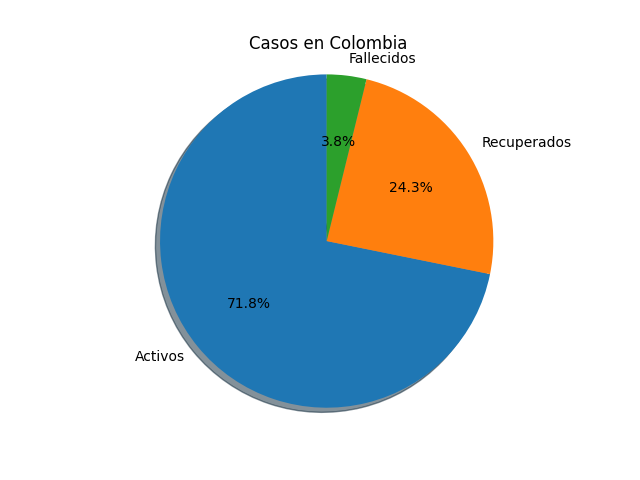

In [13]:
from pyspark.sql import functions as F
col_activos=col.filter((col['atención']!='Recuperado')&(col['atención']!='Fallecido')).groupBy('atención').count().groupBy().agg(F.sum("count")).collect()
col_rec=col.filter(col['atención']=='Recuperado').groupBy('atención').count().groupBy().agg(F.sum("count")).collect()
col_dea=col.filter(col['atención']=='Fallecido').groupBy('atención').count().groupBy().agg(F.sum("count")).collect()
ca=col_activos[0]['sum(count)'] 
cr=col_rec[0]['sum(count)']
cd=col_dea[0]['sum(count)']

#Casos actuales en el colombia
labels= ['Activos','Recuperados', 'Fallecidos']
sizes=[ca,cr,cd]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Casos en Colombia')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

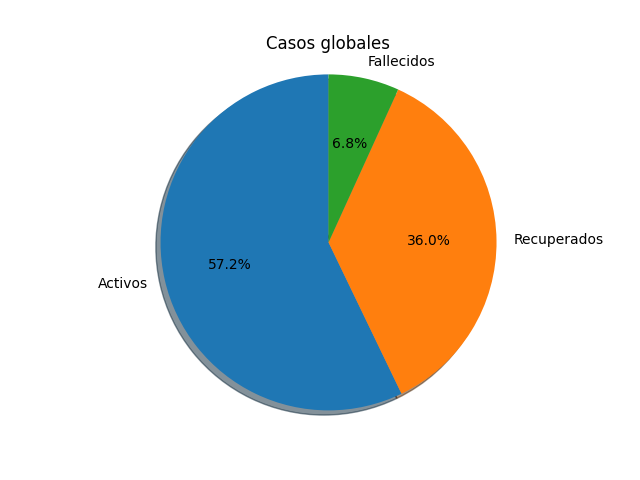

In [15]:
#casos totales en el mundo
total_cases=global_cases.groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
total_recovered=global_recovered.groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
total_deaths=global_deaths.groupBy('Country/Region').max('Value').groupBy().agg(F.sum("max(Value)")).collect()
actives = total_cases[0]['sum(max(Value))']-(total_recovered[0]['sum(max(Value))']+total_deaths[0]['sum(max(Value))'])
recovered =total_recovered[0]['sum(max(Value))']
death = total_deaths[0]['sum(max(Value))']
labels= ['Activos','Recuperados', 'Fallecidos']
sizes=[actives,recovered,death]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Casos globales')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

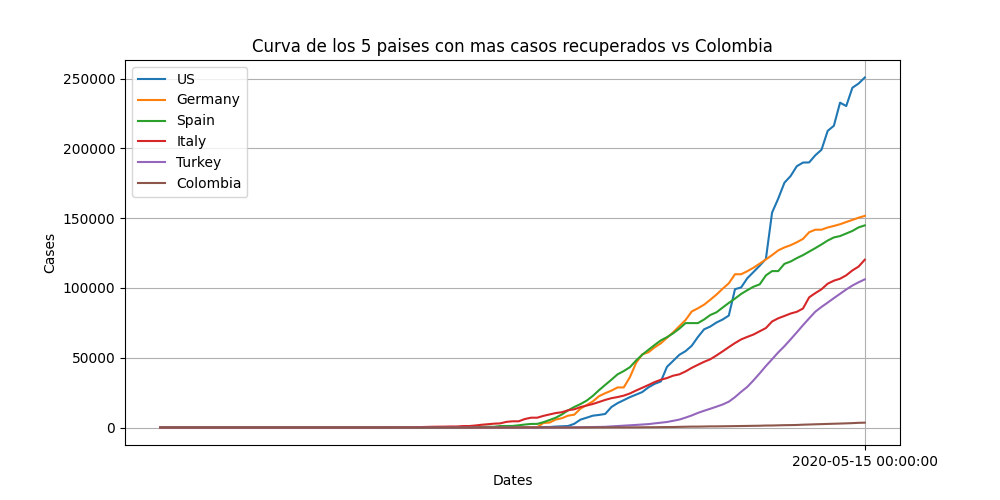

In [46]:
#Historico de los 5 paises con mas recuperados vs Colombia
#US
global_recovered=global_recovered.withColumn("Dates",global_recovered['Date'].astype('String'))
datessu=  global_recovered.filter(global_recovered['Country/Region']=='US').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadu= global_recovered.filter(global_recovered['Country/Region']=='US').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Germany
datessr=  global_recovered.filter(global_recovered['Country/Region']=='Germany').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadr= global_recovered.filter(global_recovered['Country/Region']=='Germany').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Spain
datessus=  global_recovered.filter(global_recovered['Country/Region']=='Spain').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadus= global_recovered.filter(global_recovered['Country/Region']=='Spain').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Italy
datessui=  global_recovered.filter(global_recovered['Country/Region']=='Italy').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadui= global_recovered.filter(global_recovered['Country/Region']=='Italy').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Turkey
datessuk=  global_recovered.filter(global_recovered['Country/Region']=='Turkey').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidaduk= global_recovered.filter(global_recovered['Country/Region']=='Turkey').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Colombia
datessc=  global_recovered.filter(global_recovered['Country/Region']=='Colombia').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadc= global_recovered.filter(global_recovered['Country/Region']=='Colombia').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(datessu, cantidadu,label='US')
ax.plot(datessr, cantidadr,label='Germany')
ax.plot(datessus, cantidadus, label='Spain')
ax.plot(datessui, cantidadui, label='Italy')
ax.plot(datessuk, cantidaduk, label='Turkey')
ax.plot(datessc, cantidadc, label='Colombia')

ax.set(xlabel='Dates', ylabel='Cases',
       title='Curva de los 5 paises con mas casos recuperados vs Colombia')
ax.grid()
ax.set_xticks(datessu[-1:])
ax.legend()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

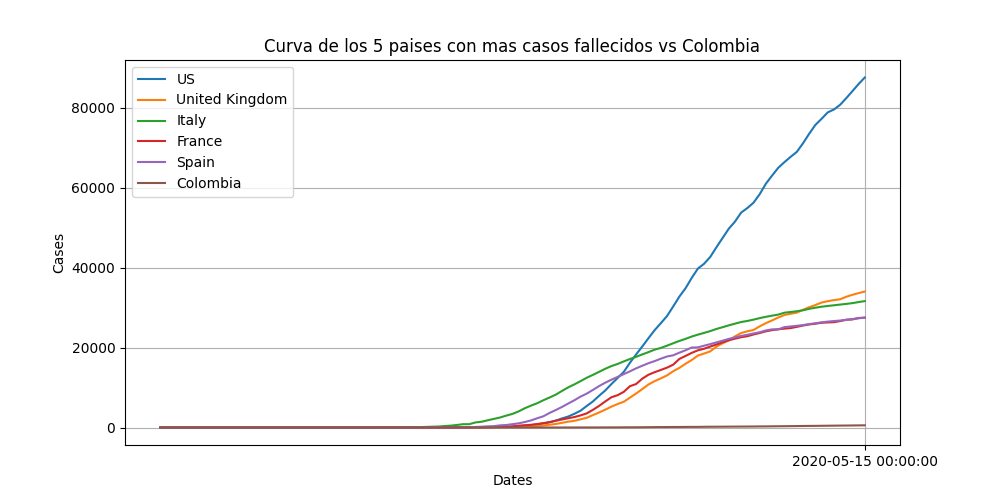

In [48]:
#Historico de los 5 paises con mas recuperados vs Colombia
#US
global_deaths=global_deaths.withColumn("Dates",global_deaths['Date'].astype('String'))
datessu=  global_deaths.filter(global_deaths['Country/Region']=='US').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadu= global_deaths.filter(global_deaths['Country/Region']=='US').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#United Kingdom
datessuk=  global_deaths.filter(global_deaths['Country/Region']=='United Kingdom').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidaduk= global_deaths.filter(global_deaths['Country/Region']=='United Kingdom').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Italy
datessui=  global_deaths.filter(global_deaths['Country/Region']=='Italy').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadui= global_deaths.filter(global_deaths['Country/Region']=='Italy').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#France
datessr=  global_deaths.filter(global_deaths['Country/Region']=='France').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadr= global_deaths.filter(global_deaths['Country/Region']=='France').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Spain
datessus=  global_deaths.filter(global_deaths['Country/Region']=='Spain').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadus= global_deaths.filter(global_deaths['Country/Region']=='Spain').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()
#Colombia
datessc=  global_deaths.filter(global_deaths['Country/Region']=='Colombia').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['Dates'].values.tolist()
cantidadc= global_deaths.filter(global_deaths['Country/Region']=='Colombia').groupBy('Dates').max('Value').orderBy('Dates',ascending=True).toPandas()['max(Value)'].values.tolist()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(datessu, cantidadu,label='US')
ax.plot(datessuk, cantidaduk, label='United Kingdom')
ax.plot(datessui, cantidadui, label='Italy')
ax.plot(datessr, cantidadr,label='France')
ax.plot(datessus, cantidadus, label='Spain')
ax.plot(datessc, cantidadc, label='Colombia')

ax.set(xlabel='Dates', ylabel='Cases',
       title='Curva de los 5 paises con mas casos fallecidos vs Colombia')
ax.grid()
ax.set_xticks(datessu[-1:])
ax.legend()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

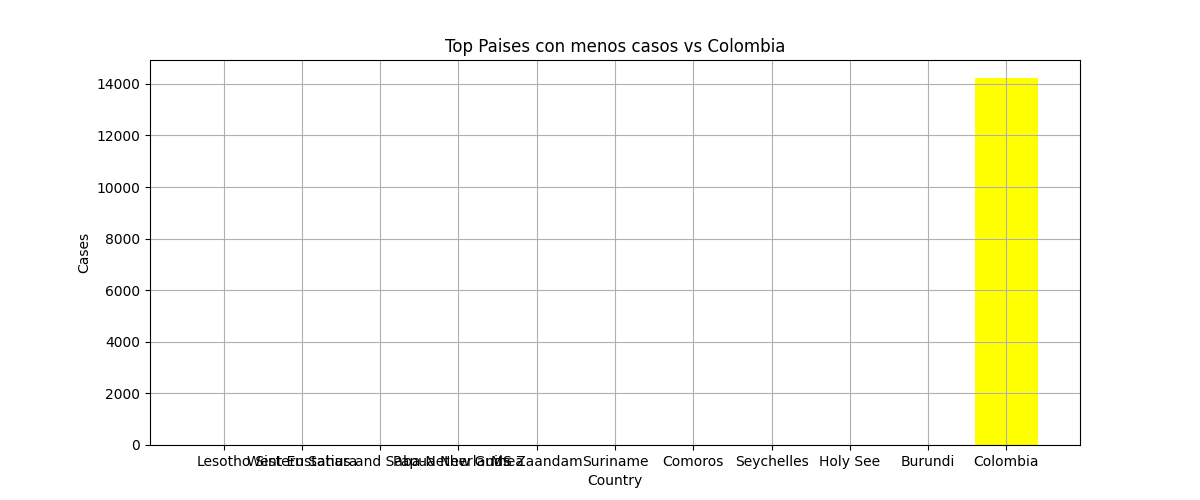

In [41]:
#Los 10 paises con menos casos vs Colombia
paises=  global_cases.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=True).toPandas()['Country/Region'].values.tolist()
paises=paises[0:10]
paises.append('Colombia')
casos=global_cases.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=True).toPandas()['max(Value)'].values.tolist()
a=global_cases.filter(global_cases['Country/Region']=='Colombia').groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=False).toPandas()['max(Value)']
casos=casos[0:10]
casos.append(a[0])
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(paises, casos, color='Yellow')
ax.set(xlabel='Country', ylabel='Cases',
       title='Top Paises con menos casos vs Colombia')
ax.grid()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

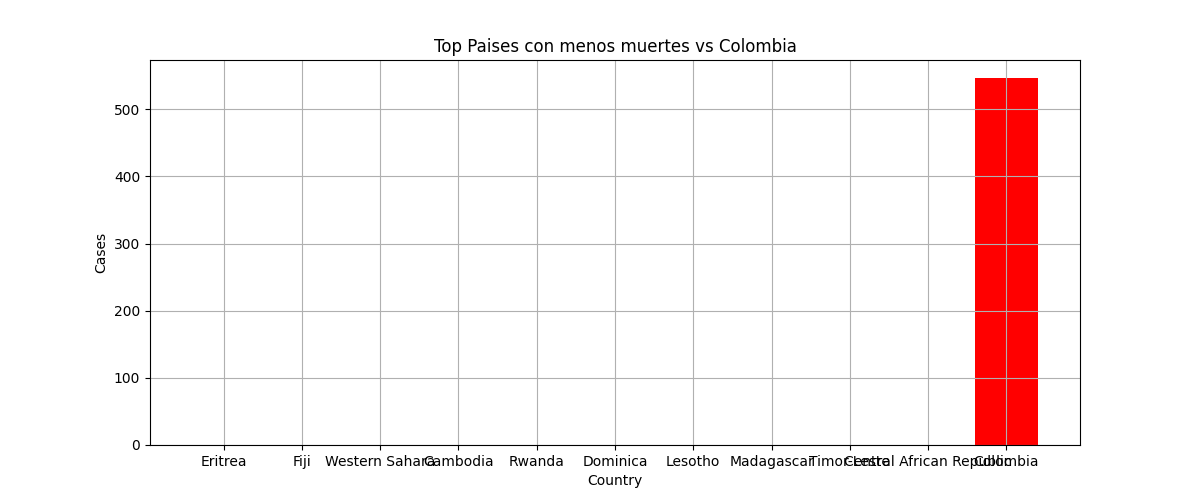

In [40]:
#Los 10 paises con menos muertes vs Colombia
paises=  global_deaths.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=True).toPandas()['Country/Region'].values.tolist()
paises=paises[0:10]
paises.append('Colombia')
casos=global_deaths.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=True).toPandas()['max(Value)'].values.tolist()
a=global_deaths.filter(global_deaths['Country/Region']=='Colombia').groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=False).toPandas()['max(Value)']
casos=casos[0:10]
casos.append(a[0])
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(paises, casos, color='Red')
ax.set(xlabel='Country', ylabel='Cases',
       title='Top Paises con menos muertes vs Colombia')
ax.grid()
%matplot plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

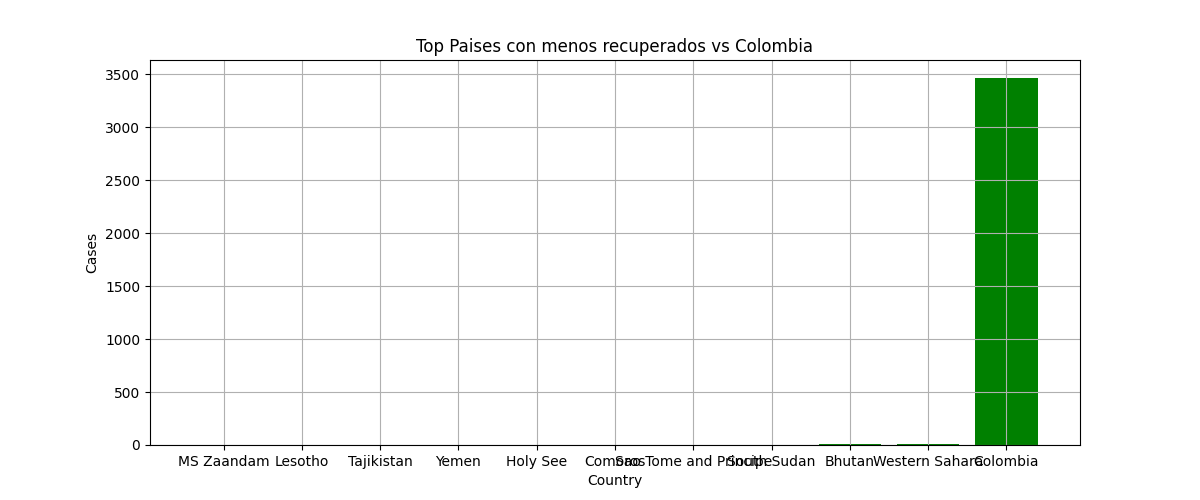

In [39]:
#Los 10 paises con menos recuperados vs Colombia
paises=  global_recovered.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=True).toPandas()['Country/Region'].values.tolist()
paises=paises[0:10]
paises.append('Colombia')
casos=global_recovered.groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=True).toPandas()['max(Value)'].values.tolist()
a=global_recovered.filter(global_recovered['Country/Region']=='Colombia').groupBy('Country/Region').max('Value').orderBy('max(Value)',ascending=False).toPandas()['max(Value)']
casos=casos[0:10]
casos.append(a[0])
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(paises, casos, color='Green')
ax.set(xlabel='Country', ylabel='Cases',
       title='Top Paises con menos recuperados vs Colombia')
ax.grid()
%matplot plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

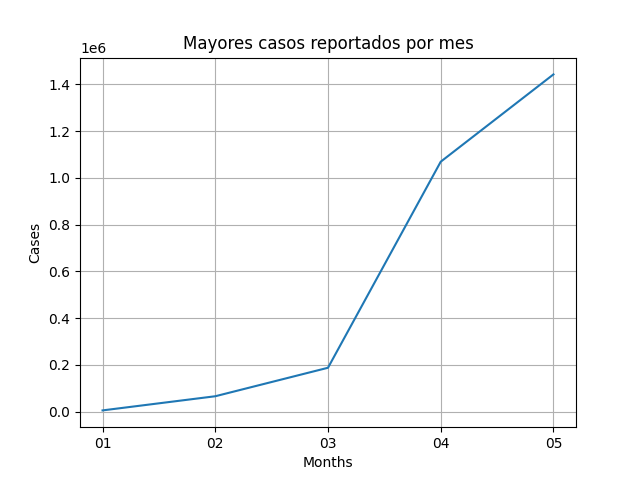

In [43]:
from pyspark.sql.functions import udf

#Funcion para extraer el mes
from pyspark.sql.types import StringType,DoubleType,IntegerType
def cases_month(date): 
    date =str(date)
    y,m,d=date.split('-')
    return m

#create udf using python function
month_udf=udf(cases_month,StringType())
#agregamos la columna mes
global_cases=global_cases.withColumn('mes',month_udf(global_cases['Date']))

#Mayores casos reportados por mes en el mundo
meses=  global_cases.groupBy('mes').max('Value').orderBy('mes',ascending=True).toPandas()['mes'].values.tolist()
cantidad= global_cases.groupBy('mes').max('Value').orderBy('mes',ascending=True).toPandas()['max(Value)'].values.tolist()
fig, ax = plt.subplots()
ax.plot(meses, cantidad)
ax.set(xlabel='Months', ylabel='Cases',
       title='Mayores casos reportados por mes')
ax.grid()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

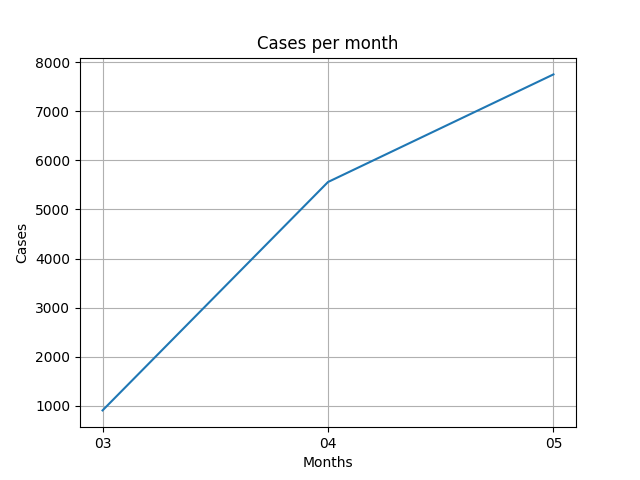

In [45]:
#Funcion para extraer el mes de diagnostico 
from pyspark.sql.types import StringType,DoubleType,IntegerType
def cases_month(date):
   date =str(date)
   date1,hour = date.split(" ")
   y,m,d=date1.split('-')
   return m

#create udf using python function
month_udf=udf(cases_month,StringType())
#agregamos la columna mes
col= col.withColumn('month_diagnosis',month_udf(col['Fecha diagnostico']))

#Casos por mes en Colombia
meses=  col.groupBy('month_diagnosis').count().orderBy('month_diagnosis',ascending=True).toPandas()['month_diagnosis'].values.tolist()
cantidad=col.groupBy('month_diagnosis').count().orderBy('month_diagnosis',ascending=True).toPandas()['count'].values.tolist()
fig, ax = plt.subplots()
ax.plot(meses, cantidad)
ax.set(xlabel='Months', ylabel='Cases',
       title='Cases per month')
ax.grid()
%matplot plt